<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/1_getting_started_roadmap/5_update_hyperparams/2_data_params/1)%20Change%20batch%20sizes%20from%20default%20state.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goals


### Learn how to change batch size

# Table of Contents


## [0. Install](#0)


## [1. Train with a preset batch size of 4](#1)


## [2. Train with an updated batch size of 8](#2)


## [3. Compare both the experiments](#3)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [1]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 2457 (delta 27), reused 0 (delta 0), pack-reused 2404
Receiving objects: 100% (2457/2457), 78.20 MiB | 4.45 MiB/s, done.
Resolving deltas: 100% (1362/1362), done.


In [ ]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

## Dataset -Skin cancer Mnist
    - https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000

In [1]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1MRC58-oCdR1agFTWreDFqevjEOIWDnYZ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1MRC58-oCdR1agFTWreDFqevjEOIWDnYZ" -O skin_cancer_mnist_dataset.zip && rm -rf /tmp/cookies.txt

--2020-03-15 21:38:13--  https://docs.google.com/uc?export=download&id=1MRC58-oCdR1agFTWreDFqevjEOIWDnYZ
Resolving docs.google.com (docs.google.com)... 172.217.27.206, 2404:6800:4009:80d::200e
Connecting to docs.google.com (docs.google.com)|172.217.27.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.20K  --.-KB/s    in 0s      

2020-03-15 21:38:13 (17.4 MB/s) - written to stdout [3275]

--2020-03-15 21:38:13--  https://docs.google.com/uc?export=download&confirm=01Re&id=1MRC58-oCdR1agFTWreDFqevjEOIWDnYZ
Resolving docs.google.com (docs.google.com)... 172.217.27.206, 2404:6800:4009:80d::200e
Connecting to docs.google.com (docs.google.com)|172.217.27.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-c0-docs.googleusercontent.com/docs/securesc/psp863mnp4mg2ljvlgun1lhjdhg0v4ss/1gapdc9lce0ujnrc8aursnnbl4kvqbg3

In [2]:
! unzip -qq skin_cancer_mnist_dataset.zip

# Imports

In [3]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [4]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

<a id='1'></a>
# Train using batch size of 4

In [5]:
gtf = prototype(verbose=1);
gtf.Prototype("change-batch-size", "size_4");

Mxnet Version: 1.5.0

Experiment Details
    Project: change-batch-size
    Experiment: size_4
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/5_update_hyperparams/2_data_params/workspace/change-batch-size/size_4/



In [6]:
gtf.Default(dataset_path="skin_cancer_mnist_dataset/images",
            path_to_csv="skin_cancer_mnist_dataset/train_labels.csv", 
            model_name="resnet18_v1", 
            freeze_base_network=False,
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     skin_cancer_mnist_dataset/images
    Val path:       None
    CSV train path: skin_cancer_mnist_dataset/train_labels.csv
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 7010
    Num val images:   3005
    Num classes:      7

Model Params
    Model name:           resnet18_v1
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v1
       

monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## Default is using batch size of 4

In [7]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.674, Train-loss: 0.970 | Val-acc: 0.697171, Val-loss: 0.863, | time: 55.5 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.739, Train-loss: 0.746 | Val-acc: 0.751747, Val-loss: 0.758, | time: 54.0 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.761, Train-loss: 0.677 | Val-acc: 0.772712, Val-loss: 0.685, | time: 53.6 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.785, Train-loss: 0.598 | Val-acc: 0.682529, Val-loss: 0.835, | time: 55.5 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.805, Train-loss: 0.559 | Val-acc: 0.776040, Val-loss: 0.612, | time: 53.4 sec

    Training completed in: 4m 29s
    Best val Acc:          0.776040

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/5_update_hyperparams/2_data_params/workspace/change-batch-size/size_4/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/5_update_hyperparams/2_data_params/workspace/change-batch-size/size_4/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_

<Figure size 432x288 with 0 Axes>

In [8]:
# Lets validate on training data itself

gtf = prototype(verbose=1);
gtf.Prototype("change-batch-size", "size_4", eval_infer=True);

gtf.Dataset_Params(dataset_path="skin_cancer_mnist_dataset/images",
            path_to_csv="skin_cancer_mnist_dataset/train_labels.csv");
gtf.Dataset();

accuracy, class_based_accuracy = gtf.Evaluate();

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/change-batch-size/size_4/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: change-batch-size
    Experiment: size_4
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/5_update_hyperparams/2_data_params/workspace/change-batch-size/size_4/

Dataset Details
    Test path:      skin_cancer_mnist_dataset/images
    CSV test path:  skin_cancer_mnist_dataset/train_labels.csv

Dataset Params
    Input Size:  224
    Processors:   4
    Delimiter:   ,

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 10015
    Num classes:      7

Testing



    Result
        class based accuracies
            0. Bowens_disease - 46.48318042813456 %
            1. basal_cell_carcinoma - 87.15953307392996 %
            2. benign_keratosis_like_lesions - 75.52320291173794 %
            3. dermatofibroma - 63.47826086956522 %
            4. melanocytic_nevi - 95.63012677106637 %
            5. melanoma - 27.22371967654987 %
            6. vascular_lesions - 83.80281690140845 %
        total images:            10015
        num correct predictions: 8337
        Average accuracy (%):    83.24513230154767



<a id='2'></a>
# Train using batch size of 8

In [9]:
gtf = prototype(verbose=1);
gtf.Prototype("change-batch-size", "size_8");

Mxnet Version: 1.5.0

Experiment Details
    Project: change-batch-size
    Experiment: size_8
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/5_update_hyperparams/2_data_params/workspace/change-batch-size/size_8/



In [10]:
gtf.Default(dataset_path="skin_cancer_mnist_dataset/images",
            path_to_csv="skin_cancer_mnist_dataset/train_labels.csv",
            model_name="resnet18_v1", 
            freeze_base_network=False,
            num_epochs=5);

#Read the summary generated once you run this cell.

Dataset Details
    Train path:     skin_cancer_mnist_dataset/images
    Val path:       None
    CSV train path: skin_cancer_mnist_dataset/train_labels.csv
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 7010
    Num val images:   3005
    Num classes:      7

Model Params
    Model name:           resnet18_v1
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v1
       

monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## Switch batch size to 8

In [11]:
gtf.update_batch_size(8);

# Very Important to reload
gtf.Reload();

Update: Batch size - 8

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 7010
    Num val images:   3005
    Num classes:      7

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v1
        Num of potentially trainable layers:  41
        Num of actual trainable layers:       41



In [12]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.711, Train-loss: 0.818 | Val-acc: 0.729784, Val-loss: 0.720, | time: 43.6 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.776, Train-loss: 0.616 | Val-acc: 0.735441, Val-loss: 0.672, | time: 44.1 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.808, Train-loss: 0.534 | Val-acc: 0.783694, Val-loss: 0.615, | time: 44.7 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.827, Train-loss: 0.456 | Val-acc: 0.802662, Val-loss: 0.541, | time: 43.6 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.851, Train-loss: 0.401 | Val-acc: 0.807987, Val-loss: 0.560, | time: 43.3 sec

    Training completed in: 3m 37s
    Best val Acc:          0.807987

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/5_update_hyperparams/2_data_params/workspace/change-batch-size/size_8/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/5_update_hyperparams/2_data_params/workspace/change-batch-size/size_8/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_

<Figure size 432x288 with 0 Axes>

## Validate the trained classifier on training data itself

In [14]:
gtf = prototype(verbose=1);
gtf.Prototype("change-batch-size", "size_8", eval_infer=True);

gtf.Dataset_Params(dataset_path="skin_cancer_mnist_dataset/images",
            path_to_csv="skin_cancer_mnist_dataset/train_labels.csv");
gtf.Dataset();

accuracy, class_based_accuracy = gtf.Evaluate();

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/change-batch-size/size_8/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: change-batch-size
    Experiment: size_8
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/5_update_hyperparams/2_data_params/workspace/change-batch-size/size_8/

Dataset Details
    Test path:      skin_cancer_mnist_dataset/images
    CSV test path:  skin_cancer_mnist_dataset/train_labels.csv

Dataset Params
    Input Size:  224
    Processors:   4
    Delimiter:   ,

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 10015
    Num classes:      7

Testing



    Result
        class based accuracies
            0. Bowens_disease - 82.87461773700305 %
            1. basal_cell_carcinoma - 79.57198443579766 %
            2. benign_keratosis_like_lesions - 84.44040036396724 %
            3. dermatofibroma - 82.6086956521739 %
            4. melanocytic_nevi - 96.55480984340045 %
            5. melanoma - 50.943396226415096 %
            6. vascular_lesions - 95.77464788732394 %
        total images:            10015
        num correct predictions: 8880
        Average accuracy (%):    88.66699950074887



<a id='3'></a>
# Compare experiments

In [15]:
# Invoke the comparison class
from compare_prototype import compare

# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Statistics");

Comparison: - Statistics


In [16]:
# Add experiment

gtf.Add_Experiment("change-batch-size", "size_4");
gtf.Add_Experiment("change-batch-size", "size_8");


# Generate stats
gtf.Generate_Statistics();

Project - change-batch-size, Experiment - size_4 added
Project - change-batch-size, Experiment - size_8 added
Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [17]:
os.listdir("workspace/comparison/Statistics")

['stats_best_val_acc.png',
 'stats_training_time.png',
 'train_accuracy.png',
 'train_loss.png',
 'val_accuracy.png',
 'stats_max_gpu_usage.png',
 'val_loss.png']

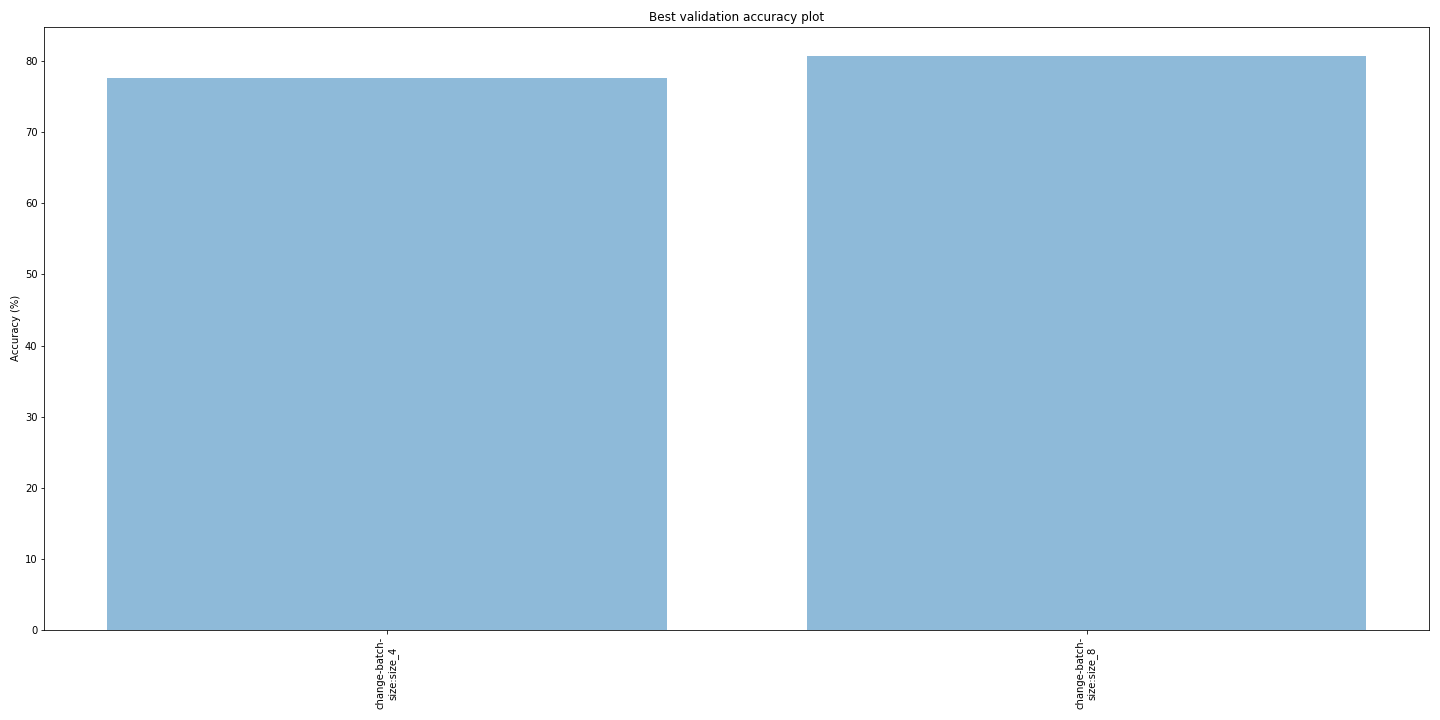

In [18]:
# We are interested in training times, validation accuracies and train-test plots

from IPython.display import Image
Image(filename="workspace/comparison/Statistics/stats_best_val_acc.png") 

## Better accuracy with larger batch size

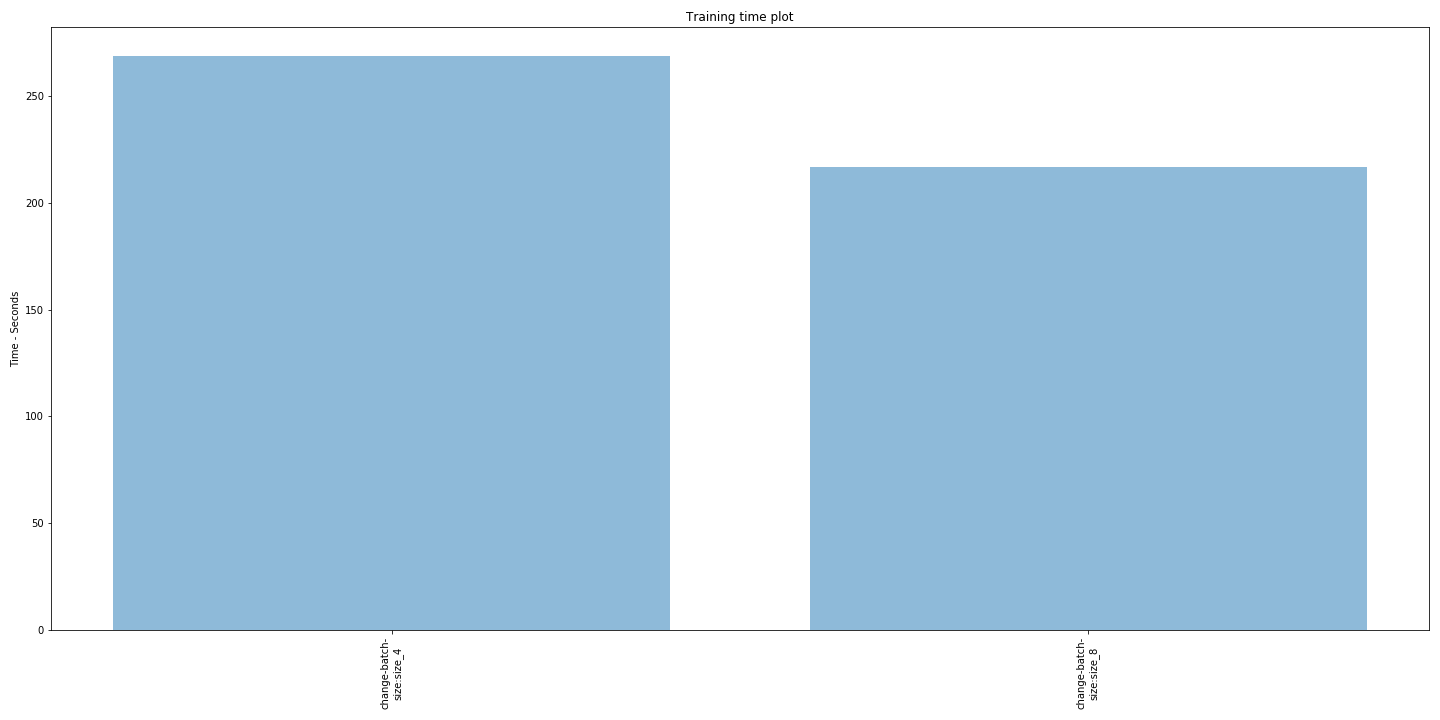

In [20]:
from IPython.display import Image
Image(filename="workspace/comparison/Statistics/stats_training_time.png") 

## Faster training with larger batch size

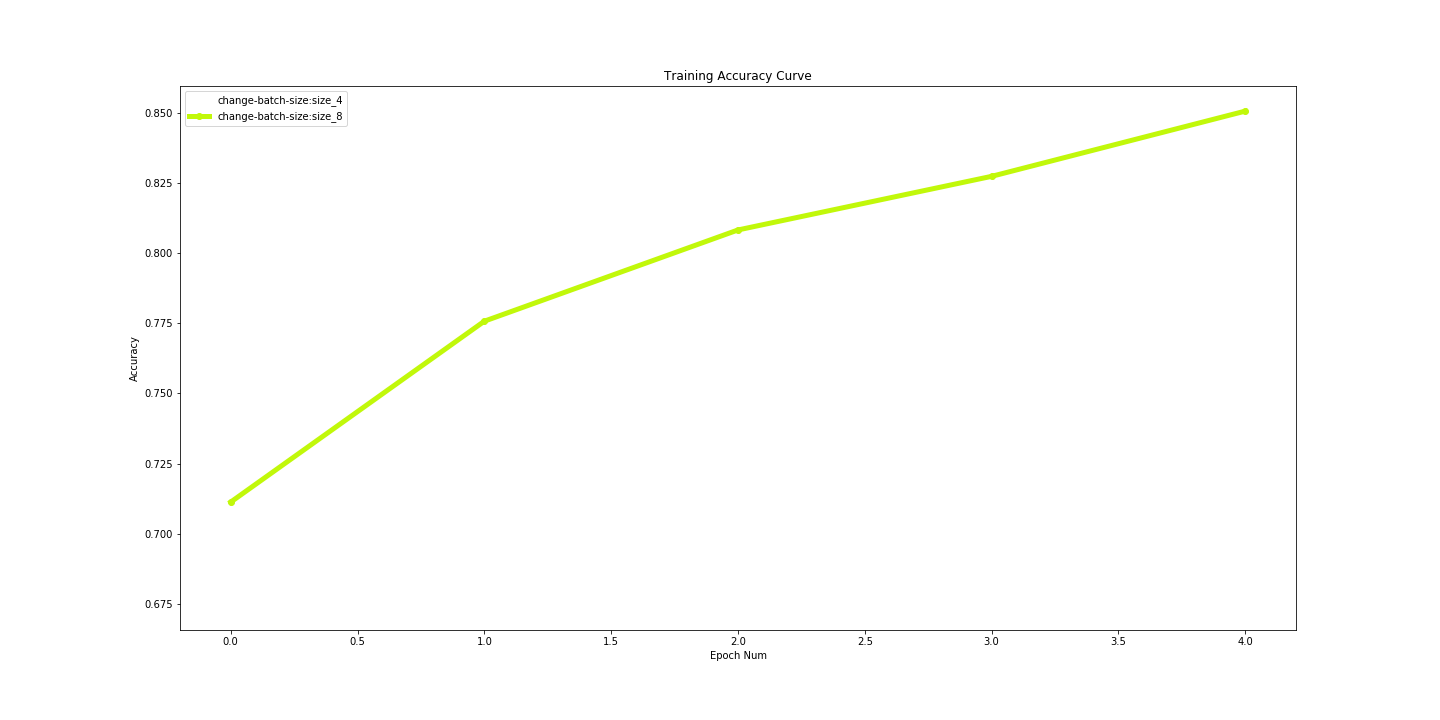

In [21]:
from IPython.display import Image
Image(filename="workspace/comparison/Statistics/train_accuracy.png") 

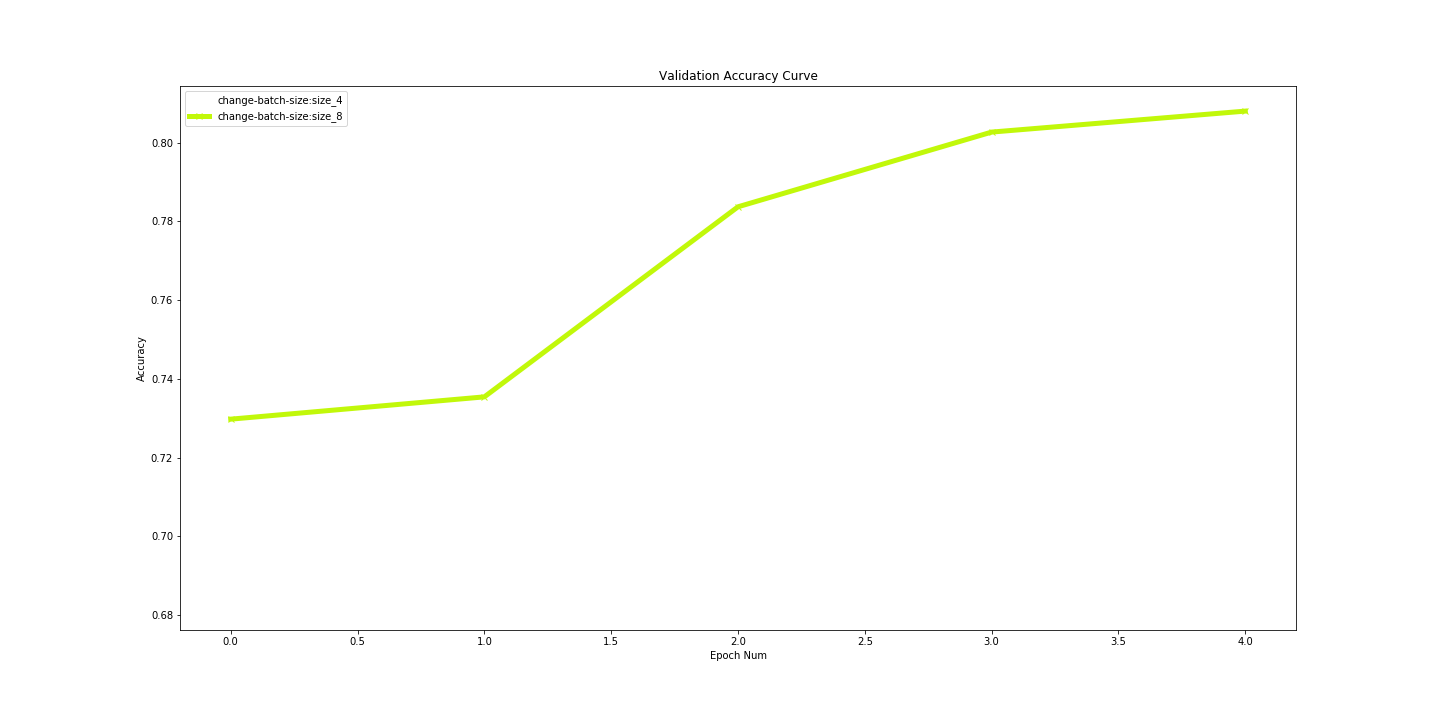

In [22]:
from IPython.display import Image
Image(filename="workspace/comparison/Statistics/val_accuracy.png") 